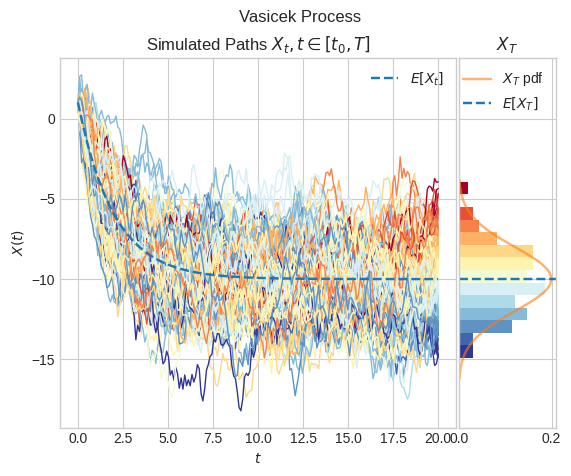

In [2]:
%pip install aleatory
from aleatory.processes import Vasicek
process = Vasicek(theta=0.5, mu=-10.0, sigma=2.0, initial=1.0, T=20.0)
process.draw(n=200, N=200, envelope=False, title='Vasicek Process')
import matplotlib.pyplot as plt
plt.show()

In [3]:
import numpy as np

theta = 0.5
mu = -10.0
sigma = 2.0
x0 = 1 # Xt at t=0
t = 20.0  # We need to find expectation , variance of Xt at t=20

expectation = x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
variance = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))

print(f"Expectation of Xt given X0 at t={t} is {expectation}")
print(f"Variance of Xt given X0 at t={t} is {variance}")

Expectation of Xt given X0 at t=20.0 is -9.999500600772613
Variance of Xt given X0 at t=20.0 is 3.9999999917553857


In [4]:
theta = 1
mu = 10.0     # Long term mean
sigma = 0.5
x0 = 1 # Xt at t=0
t = 1 # We need to find expectation , variance of Xt at t=1

mean= x0 * np.exp(-theta * t) + mu * (1 - np.exp(-theta * t))
variance = (sigma**2 / (2 * theta)) * (1 - np.exp(-2 * theta * t))

print(f"Mean of Xt given X0 at t={t} is {mean}")
print(f"Variance of Xt given X0 at t={t} is {variance}")

Mean of Xt given X0 at t=1 is 6.6890850294570185
Variance of Xt given X0 at t=1 is 0.10808308959542341


In [7]:
process = Vasicek(theta=theta, mu=mu, sigma=sigma, initial=x0)
mean_var = process.get_marginal(t)
mean = mean_var.mean()
variance = mean_var.var()
print(f"Mean of Xt given X0 at t={t} is {mean}")
print(f"Variance of Xt given X0 at t={t} is {variance}")

Mean of Xt given X0 at t=1 is 6.6890850294570185
Variance of Xt given X0 at t=1 is 0.1080830895954234


In [8]:
std_dev= np.sqrt(variance)
print(f"Standard deviation of Xt given X0 at t={t} is {std_dev}")

Standard deviation of Xt given X0 at t=1 is 0.3287599269914498


In [9]:
from scipy.stats import norm

In [10]:
X_1 = norm(loc=mean, scale=std_dev) #Marginal normal distribution

In [11]:
print(X_1)

In [21]:
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100)
pdf = X_1.pdf(x)

In [22]:
print(pdf)

[4.07075847e-04 5.60577148e-04 7.66936708e-04 1.04243201e-03
 1.40766735e-03 1.88849750e-03 2.51707914e-03 3.33304677e-03
 4.38480240e-03 5.73089861e-03 7.44148318e-03 9.59975976e-03
 1.23034046e-02 1.56658630e-02 1.98174343e-02 2.49060358e-02
 3.10975283e-02 3.85754689e-02 4.75401598e-02 5.82068560e-02
 7.08030108e-02 8.55644555e-02 1.02730437e-01 1.22537485e-01
 1.45212121e-01 1.70962498e-01 1.99969115e-01 2.32374823e-01
 2.68274442e-01 3.07704331e-01 3.50632363e-01 3.96948778e-01
 4.46458422e-01 4.98874897e-01 5.53817102e-01 6.10808617e-01
 6.69280278e-01 7.28576201e-01 7.87963344e-01 8.46644573e-01
 9.03775000e-01 9.58481201e-01 1.00988275e+00 1.05711538e+00
 1.09935488e+00 1.13584091e+00 1.16589968e+00 1.18896465e+00
 1.20459424e+00 1.21248591e+00 1.21248591e+00 1.20459424e+00
 1.18896465e+00 1.16589968e+00 1.13584091e+00 1.09935488e+00
 1.05711538e+00 1.00988275e+00 9.58481201e-01 9.03775000e-01
 8.46644573e-01 7.87963344e-01 7.28576201e-01 6.69280278e-01
 6.10808617e-01 5.538171

In [23]:
import matplotlib.pyplot as plt

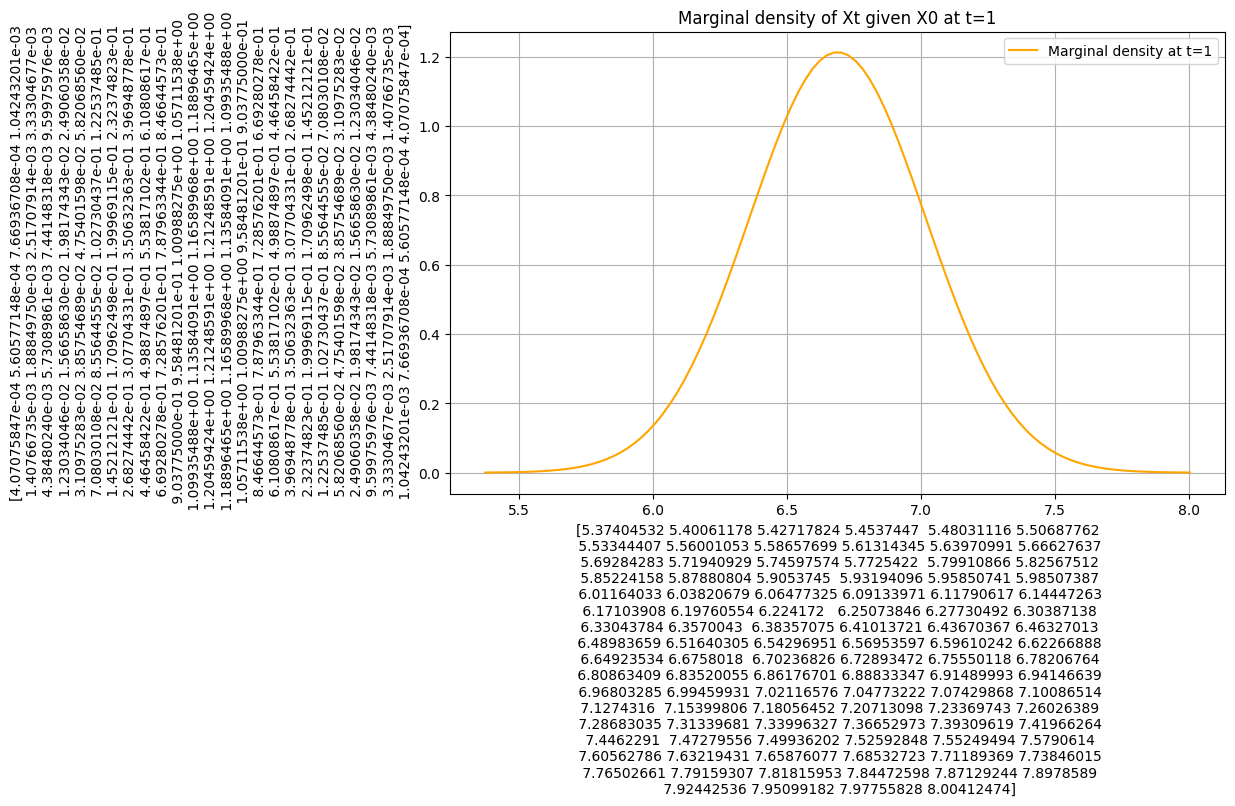

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x,pdf,label=f"Marginal density at t={t}",color='orange')
plt.xlabel(x)
plt.ylabel(pdf)
plt.title(f"Marginal density of Xt given X0 at t={t}")
plt.grid()
plt.legend()
plt.show()

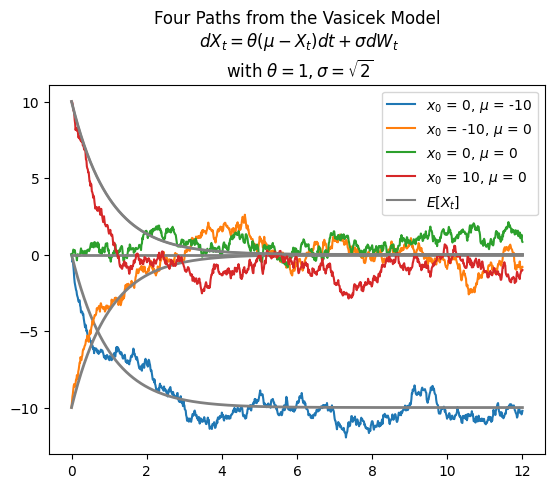

In [25]:
import matplotlib.pyplot as plt
import numpy as np

process = Vasicek(theta=1.0, mu=-10.0, sigma=np.sqrt(2), initial=0.0, T=12.0)
path = process.simulate(n=1000, N=1)
ts = process.times
exp = process.marginal_expectation(ts)
plt.plot(ts, path[0], label= f'$x_0$ = 0, $\mu$ = -10')
plt.plot(ts, exp, color='grey',linewidth=2)

for x0 in [-10.0, 0.0, 10.0]:
    process = Vasicek(theta=1.0, mu=0.0, sigma=np.sqrt(2), initial=x0, T=12.0)
    path = process.simulate(n=1000, N=1)
    plt.plot(ts, path[0], label= f'$x_0$ = {x0:.0f}, $\mu$ = 0')
    exp = process.marginal_expectation(ts)
    plt.plot(ts, exp, color='grey', linewidth=2)
plt.plot(ts, exp, color='grey', label=f'$E[X_t]$')
plt.legend()
plt.title('Four Paths from the Vasicek Model\n $dX_t = \\theta(\mu - X_t) dt + \sigma dW_t$\n with $\\theta = 1, \sigma = \sqrt{2}$')
plt.show()

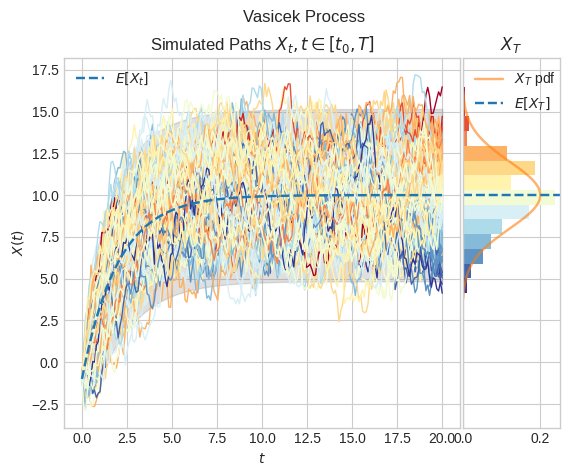

In [26]:
process = Vasicek(theta=0.5, mu=10.0, sigma=2.0, initial=-1.0, T=20.0)
fig = process.draw(n=200, N=200, envelope=True)

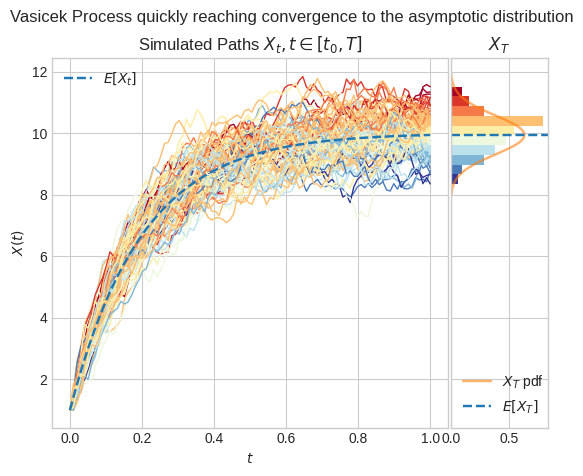

In [27]:
process = Vasicek(theta=5.0, mu=10.0, sigma=2.0, initial=1.0, T=1.0)
fig = process.draw(n=100, N=100, title='Vasicek Process quickly reaching convergence to the asymptotic distribution')

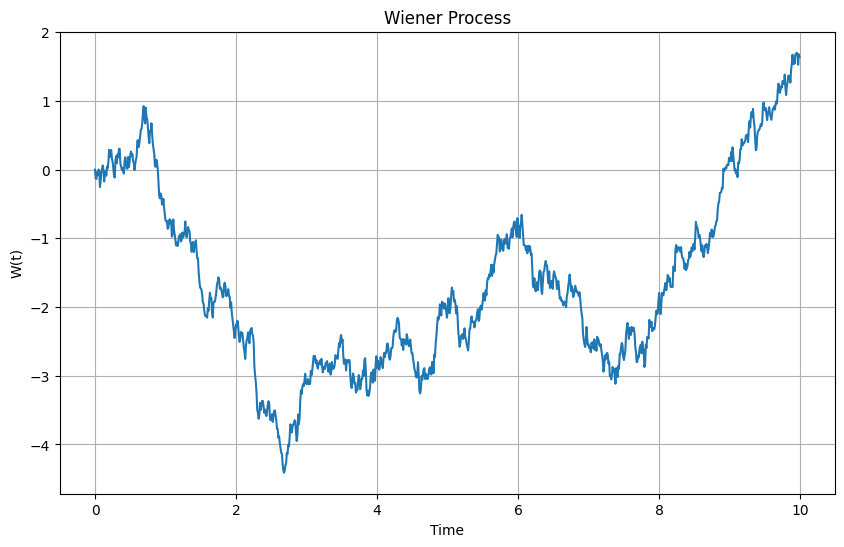

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wiener_process(num_points, dt):
    # Generate the increments using normal distribution
    increments = np.random.normal(0, np.sqrt(dt), num_points - 1)

    # The Wiener process starts at zero, so we concatenate a 0 at the beginning
    W = np.concatenate([[0], np.cumsum(increments)])

    return W

# Simulation parameters
num_points = 1000
dt = 0.01

W = simulate_wiener_process(num_points, dt)

# Plotting the Wiener process
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_points) * dt, W)
plt.title('Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()